In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ones,zeros, pi

In [2]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 25
plt.rcParams['figure.figsize'] = [16,12]

In [3]:

M = 300
N = M + 1

wc1 = 20
wc2 = 55
ws = 3000

kp = int(N*wc1/ws)
kr = int(N*wc2/ws)+1


In [4]:
A = ones(N)
A[kp:kr] = zeros(kr-kp)
A[-kr:-kp] = zeros(kr-kp)
k = np.arange(1,int(M/2)+1)
h = np.zeros(N)

In [5]:
for n in range(N):
    aux = (-1)**k * A[k] * np.cos((k*pi*(1+2*n))/N)
    h[n] = A[0] + 2*np.sum(aux)
h = h/N
h_janelado = h*np.hanning(N)

Text(0, 0.5, 'Amplitude')

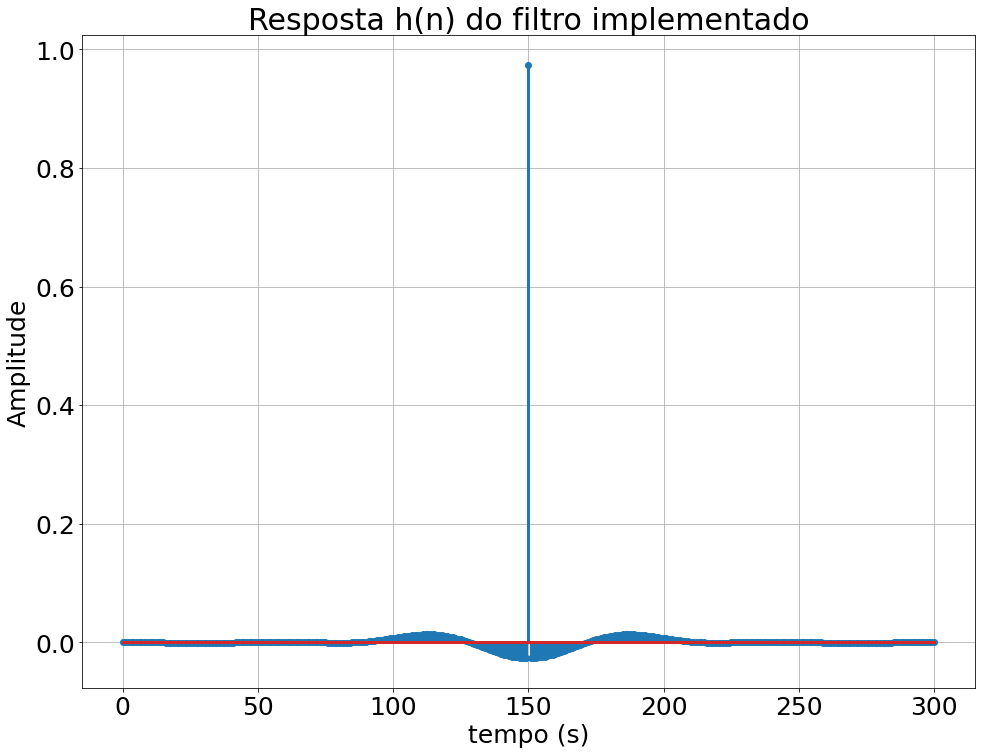

In [6]:
time = np.arange(N)
plt.stem(time,h_janelado)
plt.grid(True)
plt.title('Resposta h(n) do filtro implementado')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

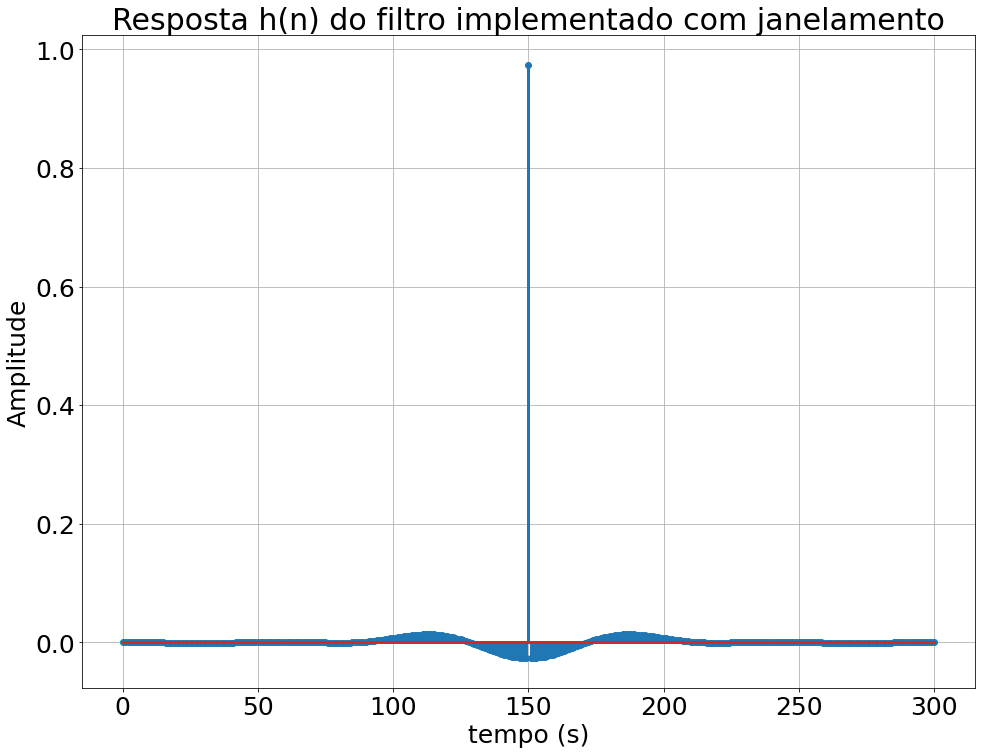

In [7]:
plt.stem(time,h_janelado)
plt.grid(True)
plt.title('Resposta h(n) do filtro implementado com janelamento')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')

In [8]:

H = np.fft.fftshift(np.fft.fft(h,))
H_janelado = np.fft.fftshift(np.fft.fft(h_janelado,))


mod_H = np.abs(H)
phase_H = np.arctan2(np.imag(H),np.real(H))
phase_H = np.unwrap(phase_H)

mod_H_janelado = np.abs(H_janelado)
phase_H_janelado = np.arctan2(np.imag(H_janelado),np.real(H_janelado))
phase_H_janelado = np.unwrap(phase_H_janelado)

freq = np.fft.fftshift(np.fft.fftfreq(N))

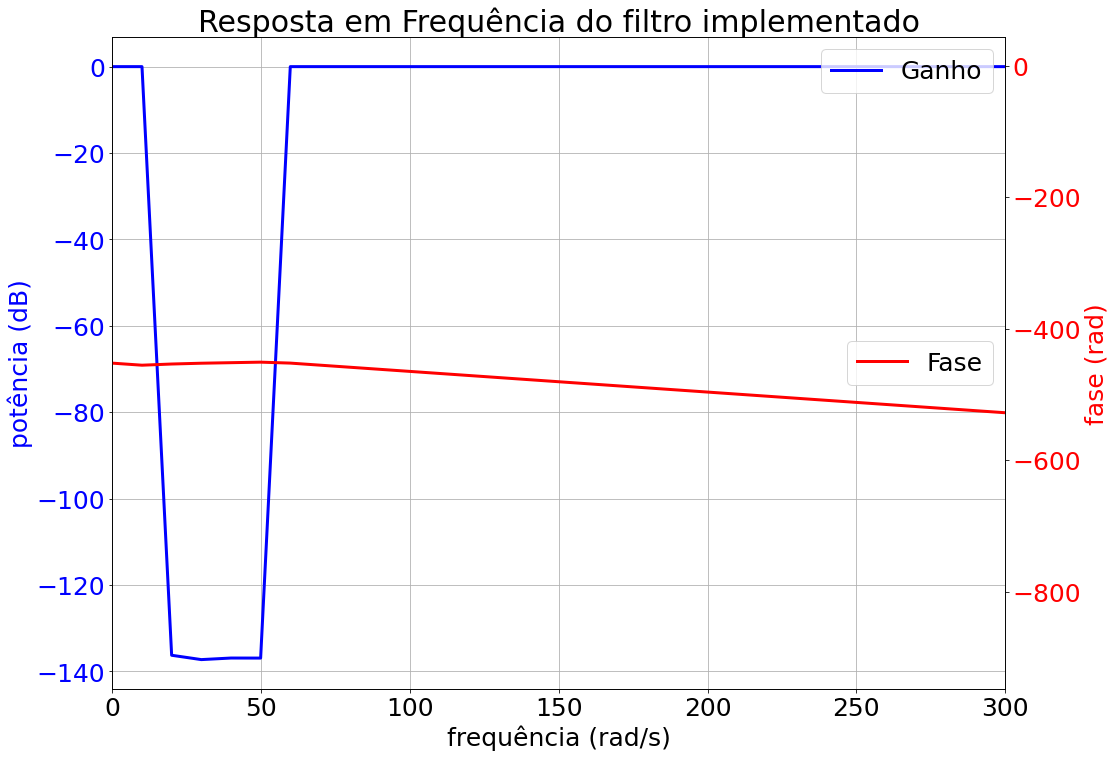

In [9]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequência (rad/s)')
ax1.set_ylabel('potência (dB)',color = 'blue')
ax1.plot(freq*ws,10*np.log10(mod_H),color = 'blue',label='Ganho')
#plt.legend(['Ganho'])
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.set_ylabel('fase (rad)',color = 'red')
ax2.plot(freq*ws, phase_H, color='red',label='Fase')
ax2.tick_params(axis='y', labelcolor='red')
plt.xlim([0,300])
plt.title('Resposta em Frequência do filtro implementado')
ax1.legend(loc='upper right')
ax2.legend(loc='center right')


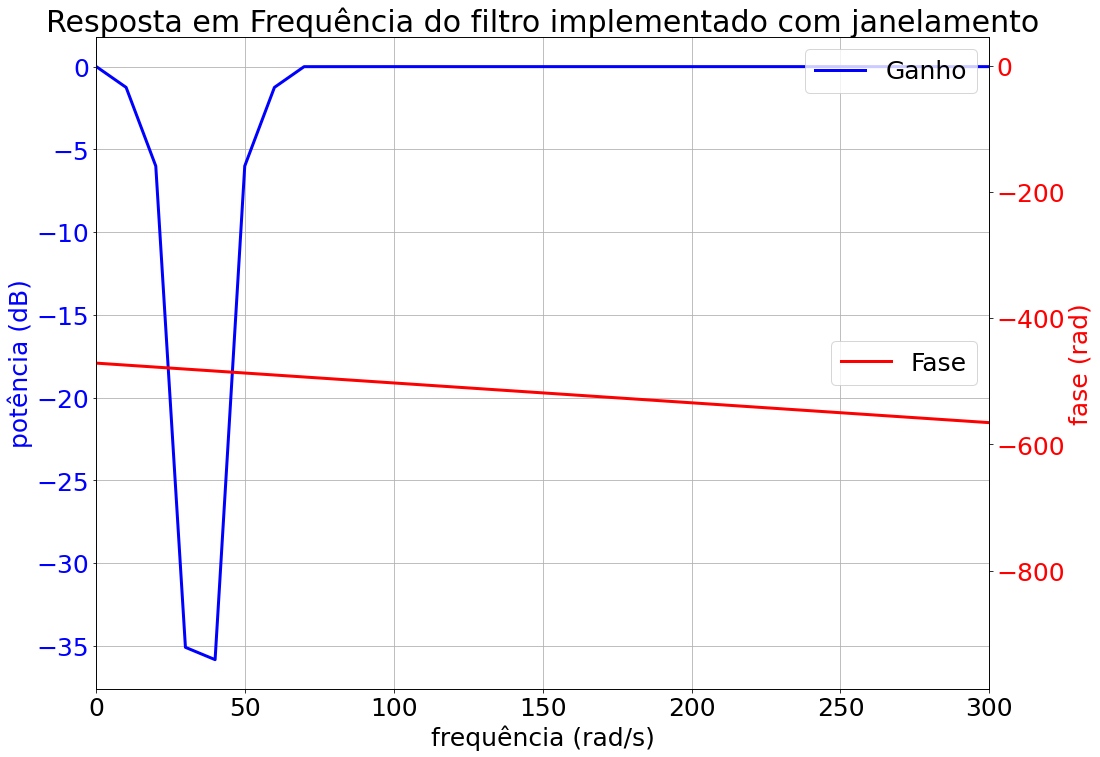

In [10]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequência (rad/s)')
ax1.set_ylabel('potência (dB)',color = 'blue')
ax1.plot(freq*ws,10*np.log10(mod_H_janelado),color = 'blue',label='Ganho')
#plt.legend(['Ganho'])
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.set_ylabel('fase (rad)',color = 'red')
ax2.plot(freq*ws, phase_H_janelado, color='red',label='Fase')
ax2.tick_params(axis='y', labelcolor='red')
plt.xlim([0,300])
plt.title('Resposta em Frequência do filtro implementado com janelamento')
ax1.legend(loc='upper right')
ax2.legend(loc='center right')